Opóźnienia i odwołania lotów
Autorzy: Aleksandra Beń, Angelika Siwek

In [1]:
import pandas as pd
import os

def read_csv_files(directory, file_extension):
    dfs = []

    for filename in os.listdir(directory):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

directory = 'data/'
#combined_df = read_csv_files(directory, '2009.csv')

df1 = pd.read_csv('data/2009.csv')
df2 = pd.read_csv('data/2010.csv')
df3 = pd.read_csv('data/2011.csv')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)


In [11]:
def display_dataframe_info(df):
    pd.set_option('display.max_columns', None)
    print("Basic information about the DataFrame:")
    print(df.info())

    print("\nSummary statistics of the DataFrame:")
    print(df.describe())

    print("\nFirst few rows of the DataFrame:")
    print(df.head())

In [4]:
import numpy as np
def clean_data(df):
    df = df.drop_duplicates()
    #if df['Unamed: 27']:
    df.drop('Unnamed: 27', axis=1, inplace=True)

    specific_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
    df[specific_columns] = df[specific_columns].fillna(0.0)

    numerical_columns = df.select_dtypes(include=['number']).columns
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])

    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
    df = df[(z_scores < 3).all(axis=1)]
    df = df.dropna()

    return df

In [5]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def convert_to_numeric(df):
    date_cols = df.select_dtypes(include=['datetime64']).columns
    reference_date = datetime(1970, 1, 1)
    for col in date_cols:
        df[col] = (df[col] - reference_date).dt.days

    label_encoder = LabelEncoder()
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        df[col] = label_encoder.fit_transform(df[col])
        
    df = df.drop(columns=string_cols)

    return df

In [6]:
import matplotlib.pyplot as plt

def select_top_correlated_features(df, target_column, num_features=5):
    numeric_df = df.select_dtypes(include=['number'])

    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[target_column].abs().sort_values(ascending=False)
    
    top_correlated_features = corr_with_target.drop(target_column)[:num_features]
    
    selected_feature_names = top_correlated_features.index.tolist()
    selected_feature_names.append(target_column)
    selected_df = df[selected_feature_names]

    selected_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    return selected_df

In [7]:
from sklearn.preprocessing import StandardScaler

def scale_data(df):
    numeric_df = df.select_dtypes(include=['number'])
    scaler = StandardScaler()

    scaled_data = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns, index=df.index)

    for column in df.columns:
        if column not in numeric_df.columns:
            scaled_df[column] = df[column]

    return scaled_df

In [8]:
def get_delay_type(row):
    if row['CARRIER_DELAY'] == 1:
        return 'CARRIER'
    elif row['WEATHER_DELAY'] == 1:
        return 'WEATHER'
    elif row['NAS_DELAY'] == 1:
        return 'NAS'
    elif row["SECURITY_DELAY"] == 1:
        return 'SECURITY'
    elif row['LATE_AIRCRAFT_DELAY'] ==1:
        return 'LATE_AIRCRAFT'
    else:
        return None


In [9]:
def display_piechart(counts, title):
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  
    plt.show()

C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\2550831973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 27', axis=1, inplace=True)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\2550831973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[specific_columns] = df[specific_columns].fillna(0.0)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\2550831973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

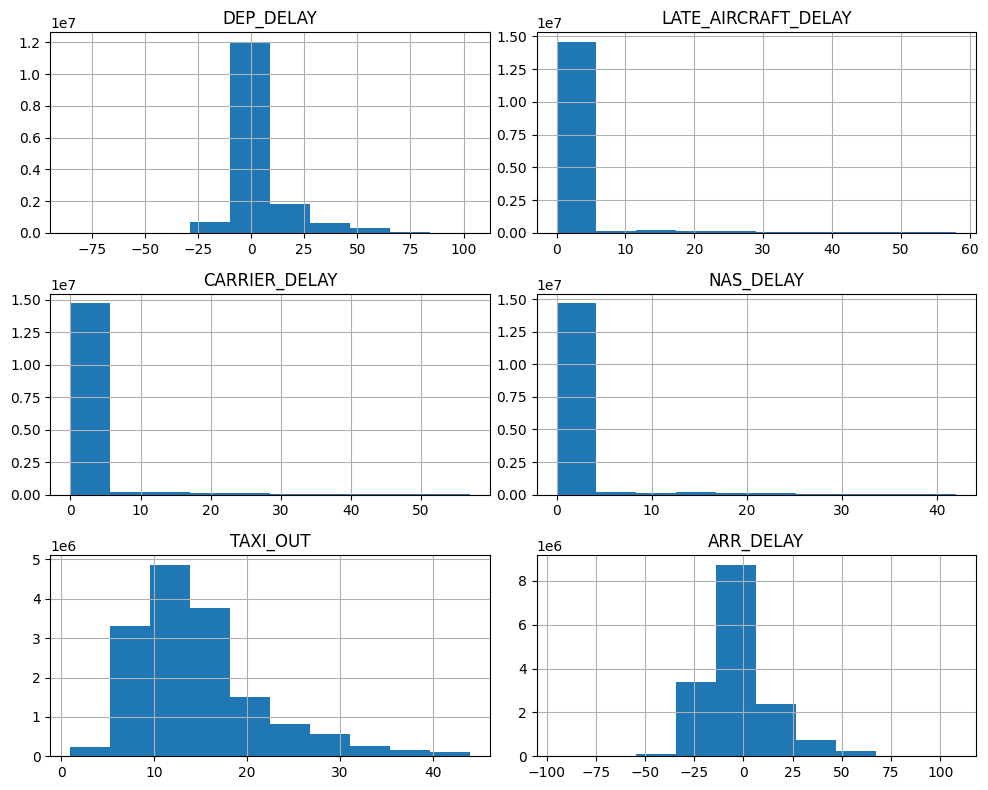

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 15554696 entries, 0 to 18946104
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DEP_DELAY            float64
 1   LATE_AIRCRAFT_DELAY  float64
 2   CARRIER_DELAY        float64
 3   NAS_DELAY            float64
 4   TAXI_OUT             float64
 5   ARR_DELAY            float64
dtypes: float64(6)
memory usage: 830.7 MB
None

Summary statistics of the DataFrame:
          DEP_DELAY  LATE_AIRCRAFT_DELAY  CARRIER_DELAY     NAS_DELAY  \
count  1.555470e+07         1.555470e+07   1.555470e+07  1.555470e+07   
mean  -1.974849e-17        -1.231540e-17  -6.808188e-18  6.110924e-17   
std    1.000000e+00         1.000000e+00   1.000000e+00  1.000000e+00   
min   -6.427186e+00        -2.277733e-01  -2.104185e-01 -2.233893e-01   
25%   -5.503140e-01        -2.277733e-01  -2.104185e-01 -2.233893e-01   
50%   -3.299313e-01        -2.277733e-01  -2.104185e-01 -

In [12]:
def prepare_data_delay(df):
    #display_dataframe_info(df)

    cleaned_df = clean_data(df)
    cleaned_df.head()

    converted_df = convert_to_numeric(cleaned_df)
    #display_dataframe_info(cleaned_df)

    selected_features_df = select_top_correlated_features(converted_df, 'ARR_DELAY', 5)
    
    scaled_df = scale_data(selected_features_df)
    display_dataframe_info(scaled_df)

copy_df = combined_df
prepare_data_delay(copy_df)

In [13]:
copy_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from sklearn.preprocessing import LabelEncoder

copy_df['DELAY_TYPE'] = copy_df.apply(get_delay_type, axis = 1)
copy_df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis = 1, inplace = True)
copy_df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)
copy_df.drop('Unnamed: 27', axis =1, inplace = True)
copy_df['FL_DATE_month'] = pd.to_datetime(copy_df['FL_DATE']).dt.month
copy_df['DEP_DELAY'].fillna(0, inplace =True)

copy_df['FL_DATE'] = pd.to_datetime(copy_df['FL_DATE'], errors='coerce')
copy_df['FL_DATE_dayofweek'] = copy_df['FL_DATE'].dt.dayofweek
copy_df['FL_DATE_dayofmonth'] = copy_df['FL_DATE'].dt.day

copy_df.head()

C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\2349977077.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_df['OP_CARRIER'].replace({
C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\2349977077.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month,FL_DATE_dayofweek,FL_DATE_dayofmonth
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,None,1,3,1
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,None,1,3,1
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,None,1,3,1
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,None,1,3,1
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,None,1,3,1


In [15]:
delayed_df = copy_df[(copy_df['DELAY_TYPE'].notna())]
canceled_df = copy_df[(copy_df['CANCELLED'] != 0)]

DELAYED FLIGHTS

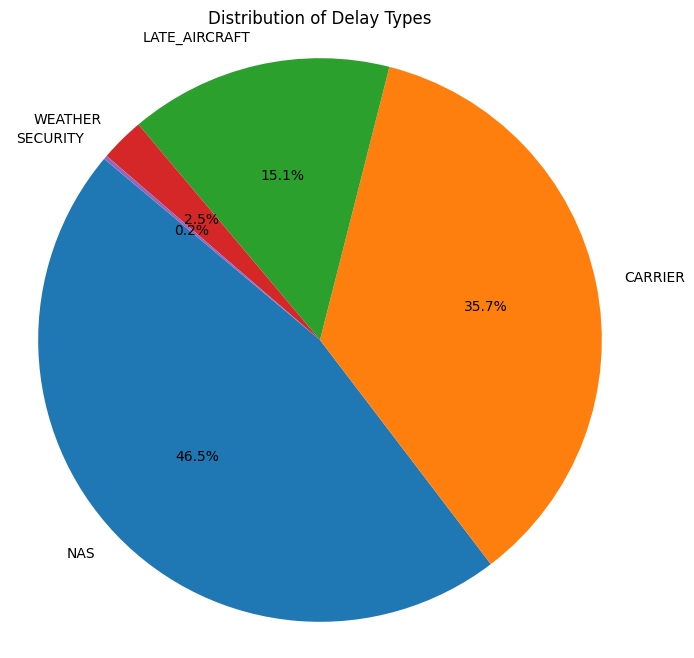

In [16]:
import matplotlib.pyplot as plt

delay_counts = delayed_df['DELAY_TYPE'].value_counts()

display_piechart(delay_counts,'Distribution of Delay Types')

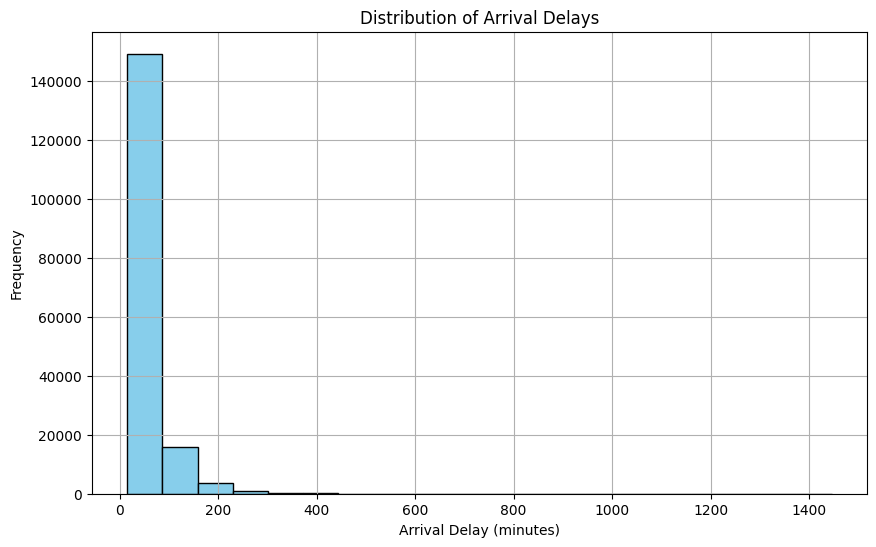

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(delayed_df['ARR_DELAY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

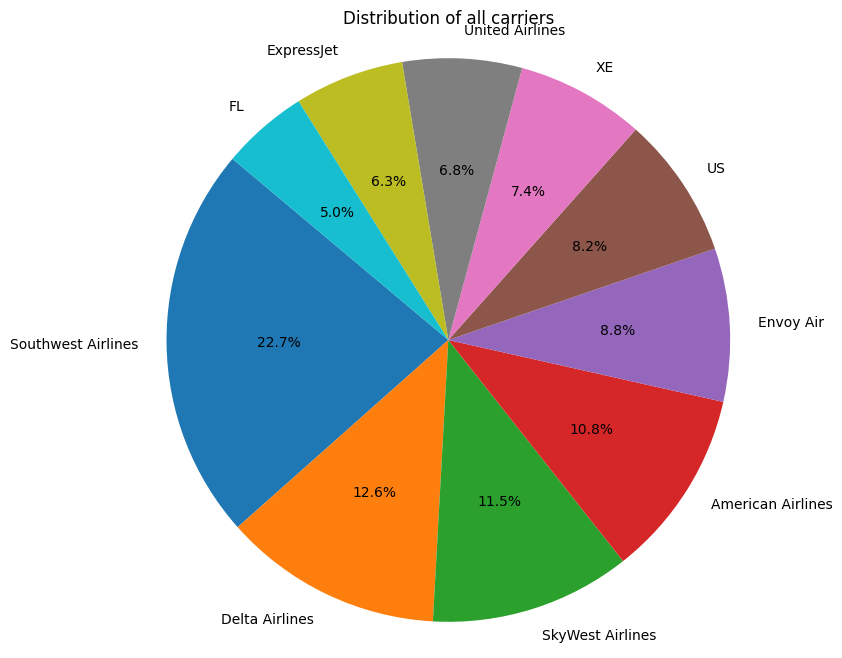

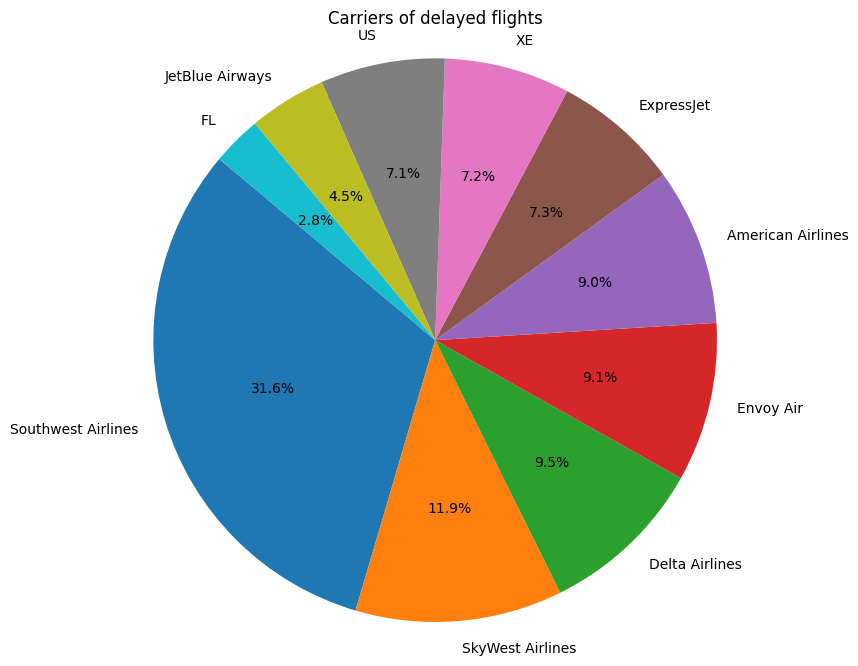

In [19]:
carriers_all = copy_df['OP_CARRIER'].value_counts()
carriers_delayed = delayed_df['OP_CARRIER'].value_counts()

plt.rcParams.update({'font.size': 10})
display_piechart(carriers_all[:10], 'Distribution of all carriers')
display_piechart(carriers_delayed[:10], 'Carriers of delayed flights')

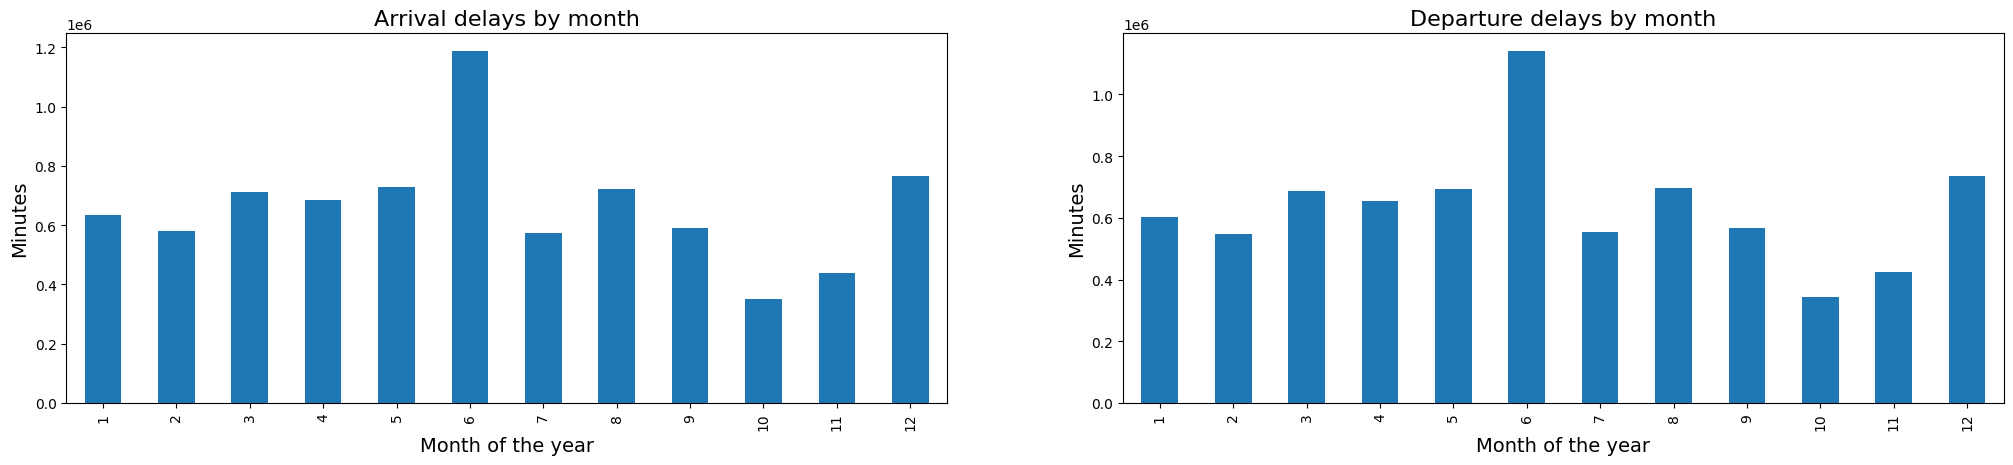

In [20]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
delayed_df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('Arrival delays by month', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
delayed_df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('Departure delays by month', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

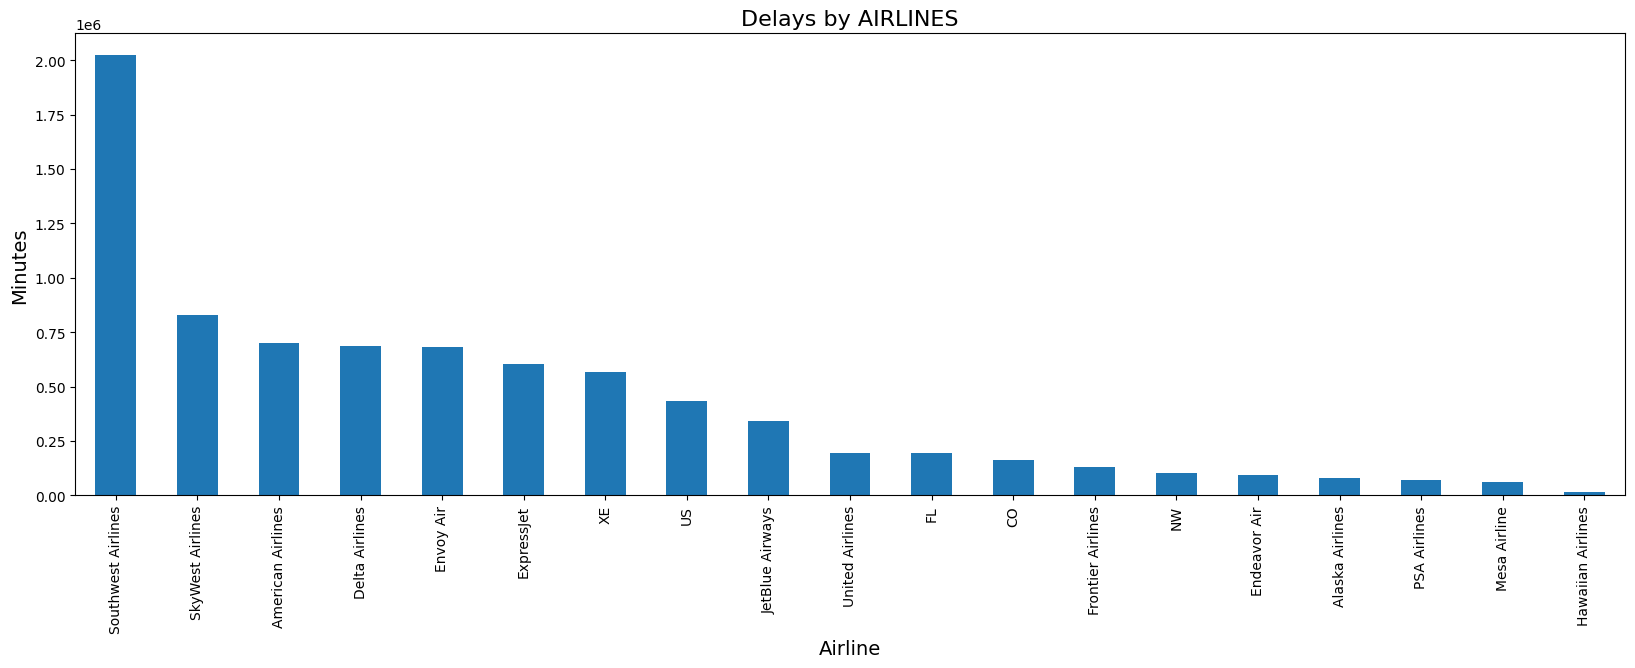

In [21]:
plt.figure(figsize=(20, 6))
delayed_df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

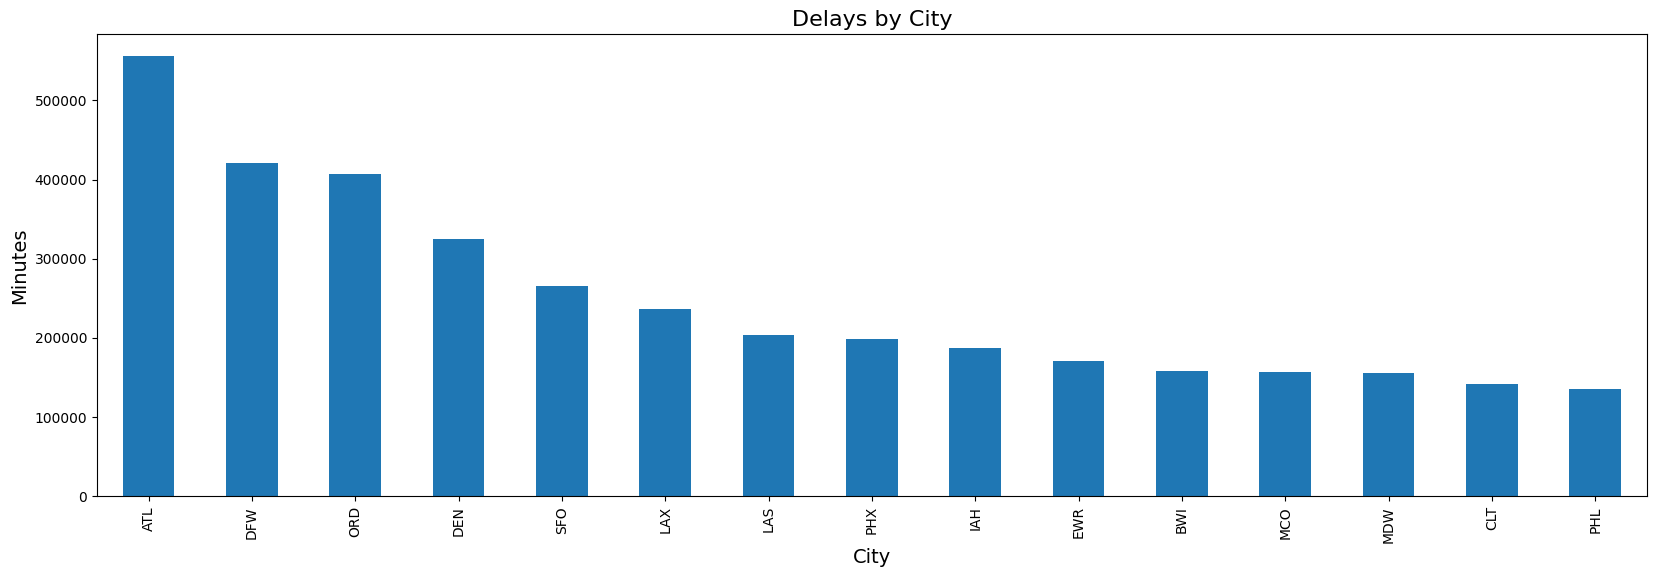

In [22]:
city_by_delay = delayed_df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

In [23]:
categorical_columns = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE', 'DELAY_TYPE']
labelEncoder = LabelEncoder()

for column in categorical_columns:
    delayed_df[column] = labelEncoder.fit_transform(delayed_df[column])

C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\83027966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_df[column] = labelEncoder.fit_transform(delayed_df[column])
C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\83027966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_df[column] = labelEncoder.fit_transform(delayed_df[column])
C:\Users\Endżi\AppData\Local\Temp\ipykernel_6704\83027966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [24]:
delayed_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month,FL_DATE_dayofweek,FL_DATE_dayofmonth
213,2009-01-01,18,2304,139,119,1220,1234.0,14.0,17.0,1251.0,1344.0,6.0,1335,1350.0,15.0,0.0,0,0.0,75.0,76.0,53.0,376.0,2,1,3,1
553,2009-01-01,18,2806,97,177,1450,1505.0,15.0,40.0,1545.0,1726.0,4.0,1714,1730.0,16.0,0.0,0,0.0,204.0,205.0,161.0,1092.0,2,1,3,1
1479,2009-01-01,12,1765,225,88,921,1010.0,49.0,31.0,1041.0,1200.0,9.0,1119,1209.0,50.0,0.0,0,0.0,118.0,119.0,79.0,453.0,2,1,3,1
1562,2009-01-01,13,6448,71,88,835,908.0,33.0,16.0,924.0,1010.0,13.0,949,1023.0,34.0,0.0,0,0.0,74.0,75.0,46.0,229.0,2,1,3,1
1612,2009-01-01,13,6515,152,215,900,955.0,55.0,32.0,1027.0,1138.0,12.0,1054,1150.0,56.0,0.0,0,0.0,174.0,175.0,131.0,740.0,2,1,3,1


In [25]:
delayed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169956 entries, 213 to 18945584
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              169956 non-null  datetime64[ns]
 1   OP_CARRIER           169956 non-null  int32         
 2   OP_CARRIER_FL_NUM    169956 non-null  int64         
 3   ORIGIN               169956 non-null  int32         
 4   DEST                 169956 non-null  int32         
 5   CRS_DEP_TIME         169956 non-null  int64         
 6   DEP_TIME             169956 non-null  float64       
 7   DEP_DELAY            169956 non-null  float64       
 8   TAXI_OUT             169956 non-null  float64       
 9   WHEELS_OFF           169956 non-null  float64       
 10  WHEELS_ON            169956 non-null  float64       
 11  TAXI_IN              169956 non-null  float64       
 12  CRS_ARR_TIME         169956 non-null  int64         
 13  ARR_TIME       

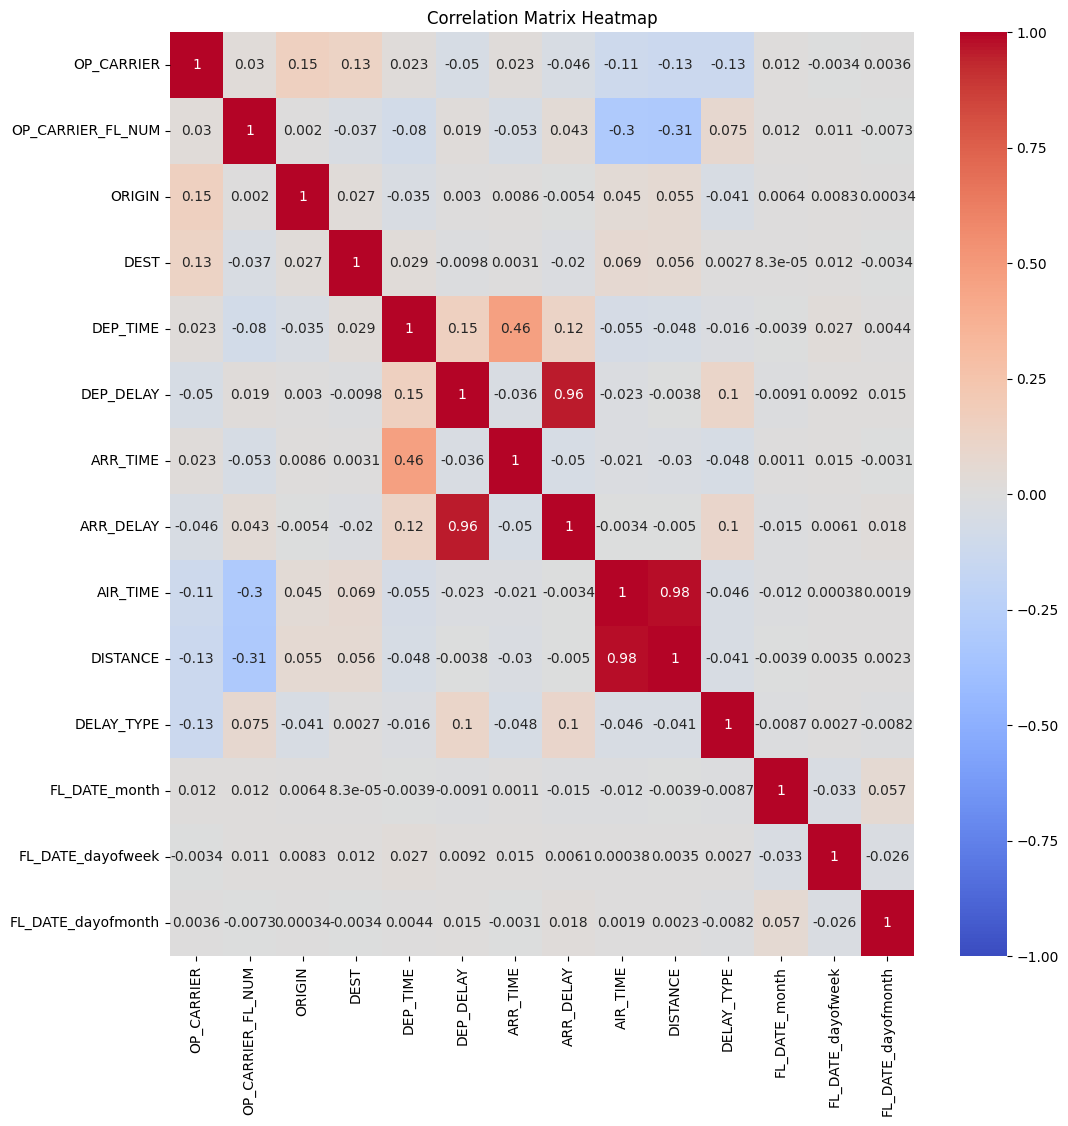

In [43]:
import seaborn as sns

filtered_columns = ['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE', 'DELAY_TYPE', 'FL_DATE_month', 'FL_DATE_dayofweek', 'FL_DATE_dayofmonth']
correlation_matrix = delayed_df[filtered_columns].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filtered_columns =['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_TYPE', 'FL_DATE_month', 'FL_DATE_dayofweek', 'FL_DATE_dayofmonth']

X = delayed_df[filtered_columns]
y = delayed_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

coefficients = pd.DataFrame({'Feature': filtered_columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 143.8797439442042
R^2 Score: 0.9342077055315746
               Feature  Coefficient
0           OP_CARRIER    -0.028611
1    OP_CARRIER_FL_NUM     0.000453
2               ORIGIN    -0.001669
3                 DEST    -0.008577
4             DEP_TIME    -0.001701
5            DEP_DELAY     0.943510
6             ARR_TIME    -0.001008
7             AIR_TIME     0.384641
8             DISTANCE    -0.045763
9           DELAY_TYPE    -0.020497
10       FL_DATE_month    -0.026936
11   FL_DATE_dayofweek    -0.016685
12  FL_DATE_dayofmonth     0.019507


Added feature: DEP_DELAY, Model: MLP Regressor, MSE: 119.14183791553604
Added feature: DELAY_TYPE, Model: MLP Regressor, MSE: 113.03113597193892
Added feature: AIR_TIME, Model: MLP Regressor, MSE: 111.7564957283169
Added feature: OP_CARRIER, Model: MLP Regressor, MSE: 111.6728569562225


C:\Users\Endżi\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Added feature: FL_DATE_dayofweek, Model: MLP Regressor, MSE: 111.28403925345913
Added feature: ARR_TIME, Model: Gradient Boosting, MSE: 111.60070785381372
Added feature: DEP_TIME, Model: Random Forest, MSE: 103.79049015389242
Added feature: ORIGIN, Model: Random Forest, MSE: 102.11375968463169
Added feature: FL_DATE_month, Model: Random Forest, MSE: 102.84190854024476
Added feature: DEST, Model: Random Forest, MSE: 103.10931715109439
Added feature: FL_DATE_dayofmonth, Model: Random Forest, MSE: 104.23696690103553

Best features: ['DEP_DELAY', 'DELAY_TYPE', 'AIR_TIME', 'OP_CARRIER', 'FL_DATE_dayofweek', 'ARR_TIME', 'DEP_TIME', 'ORIGIN'], Best Model: Random Forest, Best MSE: 102.11375968463169
Final MSE on test set with best features: 102.11375968463169
Final R^2 on test set with best features: 0.9533061544156304


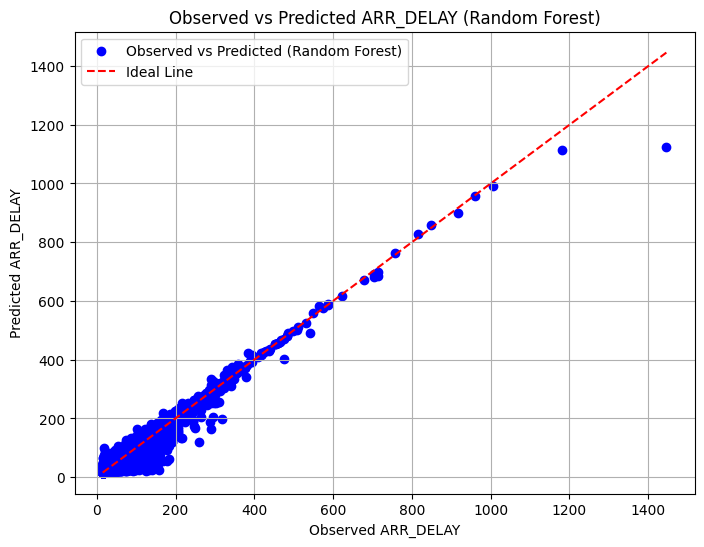

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

features = ['OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'AIR_TIME', 'DELAY_TYPE', 'FL_DATE_month', 'FL_DATE_dayofweek', 'FL_DATE_dayofmonth']
target = 'ARR_DELAY'

X = delayed_df[features]
y = delayed_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(21,), max_iter=500, early_stopping=True, random_state=42)
}

best_features = []
best_score = float('inf')  
best_model_name = None
best_model_instance = None

remaining_features = features.copy()
while remaining_features:
    scores = {model_name: [] for model_name in models.keys()}
    model_instances = {model_name: [] for model_name in models.keys()}
    
    for feature in remaining_features:
        current_features = best_features + [feature]
        
        for model_name, model in models.items():
            new_model = type(model)()
            new_model.fit(X_train[current_features], y_train)
            
            y_pred = new_model.predict(X_test[current_features])
            
            score = mean_squared_error(y_test, y_pred)
            scores[model_name].append(score)
            model_instances[model_name].append(new_model)

    best_model_name_for_feature = min(scores, key=lambda k: min(scores[k]))
    best_index = scores[best_model_name_for_feature].index(min(scores[best_model_name_for_feature]))
    best_feature = remaining_features.pop(best_index)
    best_features.append(best_feature)
    
    print(f"Added feature: {best_feature}, Model: {best_model_name_for_feature}, MSE: {scores[best_model_name_for_feature][best_index]}")

    if scores[best_model_name_for_feature][best_index] < best_score:
        best_score = scores[best_model_name_for_feature][best_index]
        best_model_name = best_model_name_for_feature
        best_model_instance = model_instances[best_model_name_for_feature][best_index]
        best_feature_set = best_features.copy()

print(f"\nBest features: {best_feature_set}, Best Model: {best_model_name}, Best MSE: {best_score}")

y_pred_best = best_model_instance.predict(X_test[best_feature_set])
final_score = mean_squared_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)
print(f"Final MSE on test set with best features: {final_score}")
print(f"Final R^2 on test set with best features: {final_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', label=f'Observed vs Predicted ({best_model_name})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Line')
plt.title(f'Observed vs Predicted ARR_DELAY ({best_model_name})')
plt.xlabel('Observed ARR_DELAY')
plt.ylabel('Predicted ARR_DELAY')
plt.legend()
plt.grid(True)
plt.show()

CANCELLED FLIGHTS

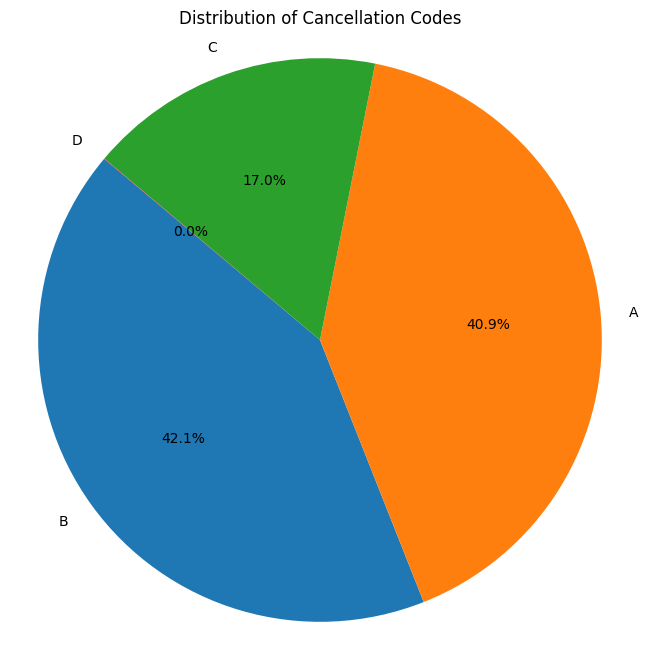

In [16]:
cancellation_codes = canceled_df['CANCELLATION_CODE'].value_counts()

display_piechart(cancellation_codes, 'Distribution of Cancellation Codes')

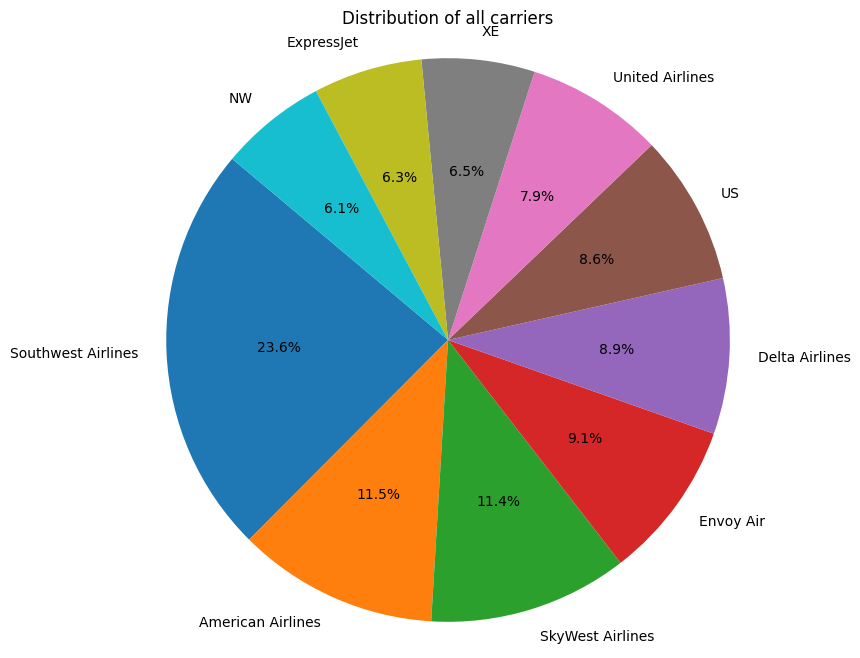

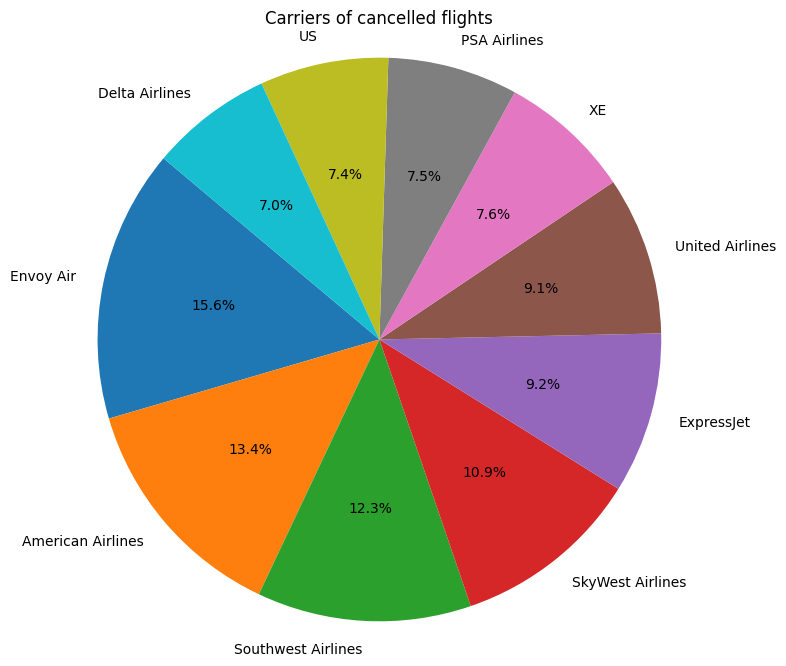

In [20]:
carriers_all = copy_df['OP_CARRIER'].value_counts()
carriers_canceled = canceled_df['OP_CARRIER'].value_counts()

plt.rcParams.update({'font.size': 10})
display_piechart(carriers_all[:10], 'Distribution of all carriers')
display_piechart(carriers_canceled[:10], 'Carriers of cancelled flights')

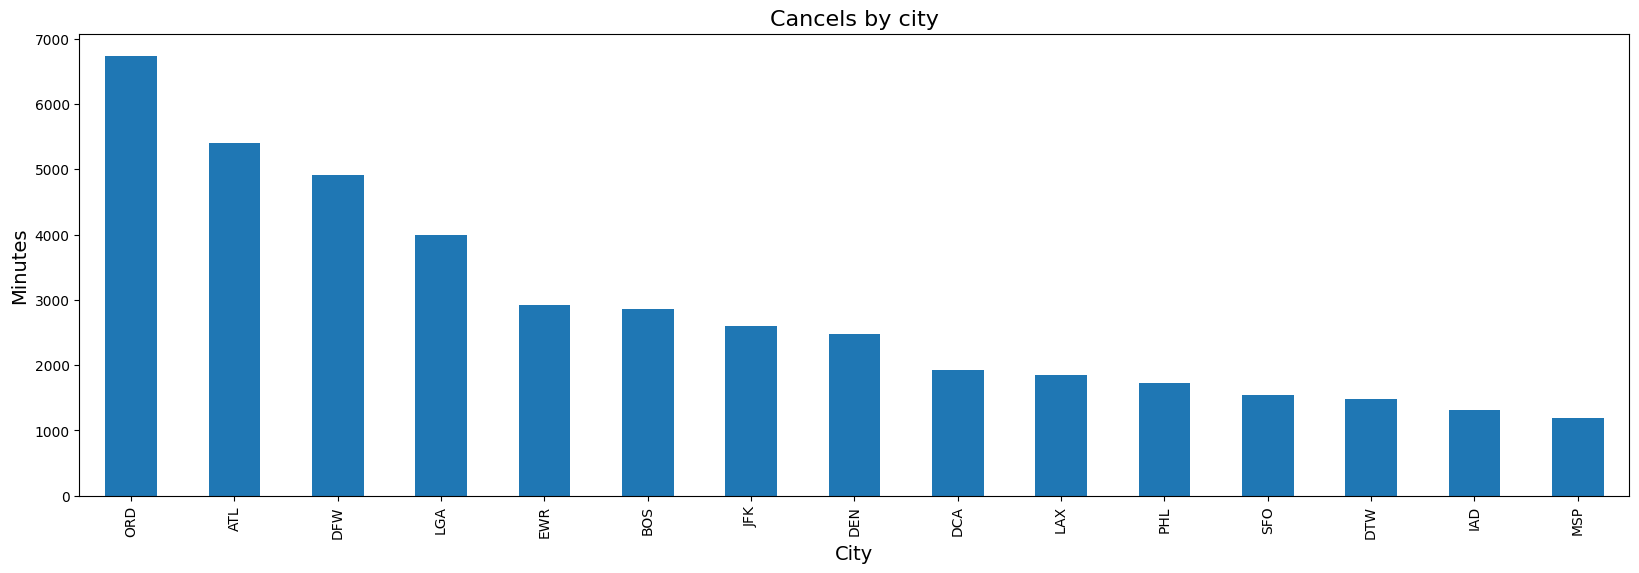

In [27]:
city_by_cancel = canceled_df.groupby('ORIGIN')['FL_DATE'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_cancel[:15].plot.bar()
plt.title('Cancels by city', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()